In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r"E:\2022-2023 hk1\PTTK\CK\code\1-12-2017 1-12-2022\MSN Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,68500.0,67000.0,69400.0,66500.0,725370.0,0.02
1,12/4/2017,69000.0,70000.0,70000.0,68800.0,1190000.0,0.01
2,12/5/2017,68900.0,69000.0,70100.0,68600.0,777070.0,0.00
3,12/6/2017,67700.0,68900.0,69000.0,66000.0,1080000.0,-0.02
4,12/7/2017,69000.0,68600.0,69800.0,67300.0,1560000.0,0.02
...,...,...,...,...,...,...,...
1244,11/25/2022,94000.0,90000.0,94500.0,90000.0,923100.0,0.06
1245,11/28/2022,97200.0,94000.0,97200.0,93500.0,2130000.0,0.03
1246,11/29/2022,99000.0,97200.0,99000.0,95500.0,2170000.0,0.02
1247,11/30/2022,102000.0,99500.0,102000.0,92900.0,1500000.0,0.03


In [3]:
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

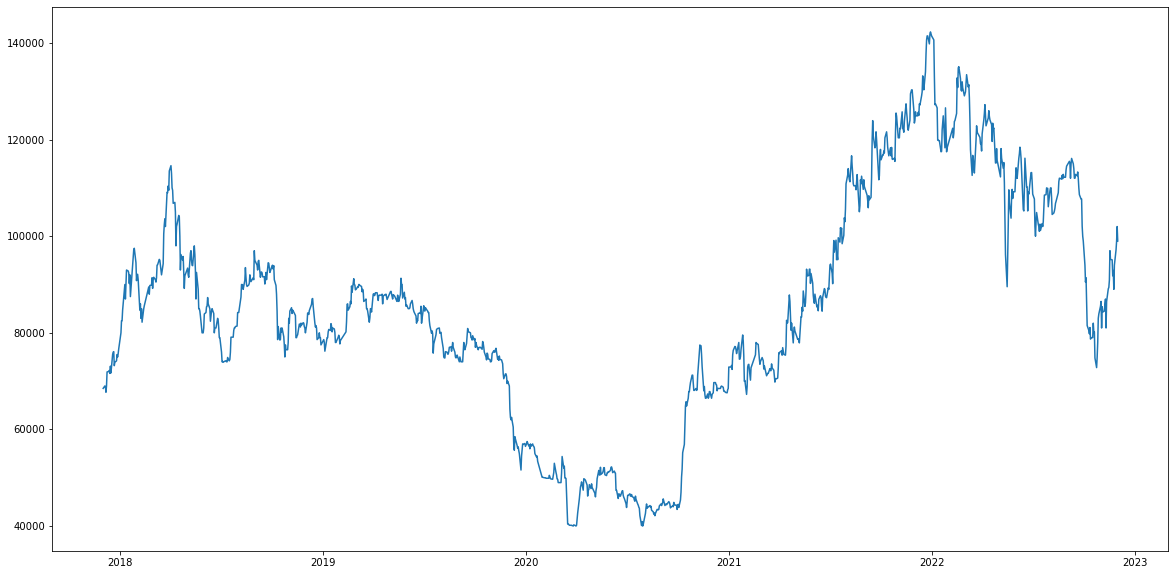

In [4]:
plt.figure(figsize=(20,10))
plt.plot(df['Price'])
plt.show()

In [5]:
# Set the index of the DataFrame to the 'date' column
df.index = df.Date
df = pd.DataFrame(df, columns=['Price'])



In [6]:
import math
data = df.values
t = math.ceil(len(df)* 0.7)
train_data = data[:t]
test_data = data[t:]

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.27865166],
       [0.28353977],
       [0.28256215],
       ...,
       [0.57682644],
       [0.60615511],
       [0.57682644]])

In [8]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (815, 60, 1).
y_train shape == (815, 1).


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf

learning_rate = 0.0001
hidden_unit = 64
batch_size = 32
epoch = 100
model = Sequential()
model.add(LSTM(units=hidden_unit, return_sequences=True, input_shape =(x_train.shape[1],1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=True,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='mean_squared_error')
pred = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epoch)

Epoch 1/100
26/26 [==============================] - 5s 41ms/step - loss: 0.1212
Epoch 2/100
26/26 [==============================] - 1s 50ms/step - loss: 0.0955
Epoch 3/100
26/26 [==============================] - 1s 56ms/step - loss: 0.0504
Epoch 4/100
26/26 [==============================] - 1s 45ms/step - loss: 0.0126
Epoch 5/100
26/26 [==============================] - 1s 46ms/step - loss: 0.0103
Epoch 6/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0085
Epoch 7/100
26/26 [==============================] - 1s 44ms/step - loss: 0.0066
Epoch 8/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0059
Epoch 9/100
26/26 [==============================] - 1s 42ms/step - loss: 0.0059
Epoch 10/100
26/26 [==============================] - 1s 43ms/step - loss: 0.0051
Epoch 11/100
26/26 [==============================] - 1s 49ms/step - loss: 0.0053
Epoch 12/100
26/26 [==============================] - 1s 46ms/step - loss: 0.0053
Epoch 13/100
26/26 [=====

In [10]:
y_train = sc.inverse_transform(y_train)

y_train_predict = model.predict(x_train)

y_train_predict = sc.inverse_transform(y_train_predict)

26/26 [==============================] - 1s 17ms/step


In [11]:
test = df[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
    x_test.append(sc_test[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data[t:]

print('x_test shape == {}.'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

x_test shape == (374, 60, 1).
y_test shape == (374, 1).


In [12]:
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

12/12 [==============================] - 0s 18ms/step


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 7837.13
MAPE: 6.83%
MSE: 85585087.96
RMSE: 9251.22
R2: 0.59


C:\Users\PC\AppData\Local\Temp\ipykernel_21552\2204084320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


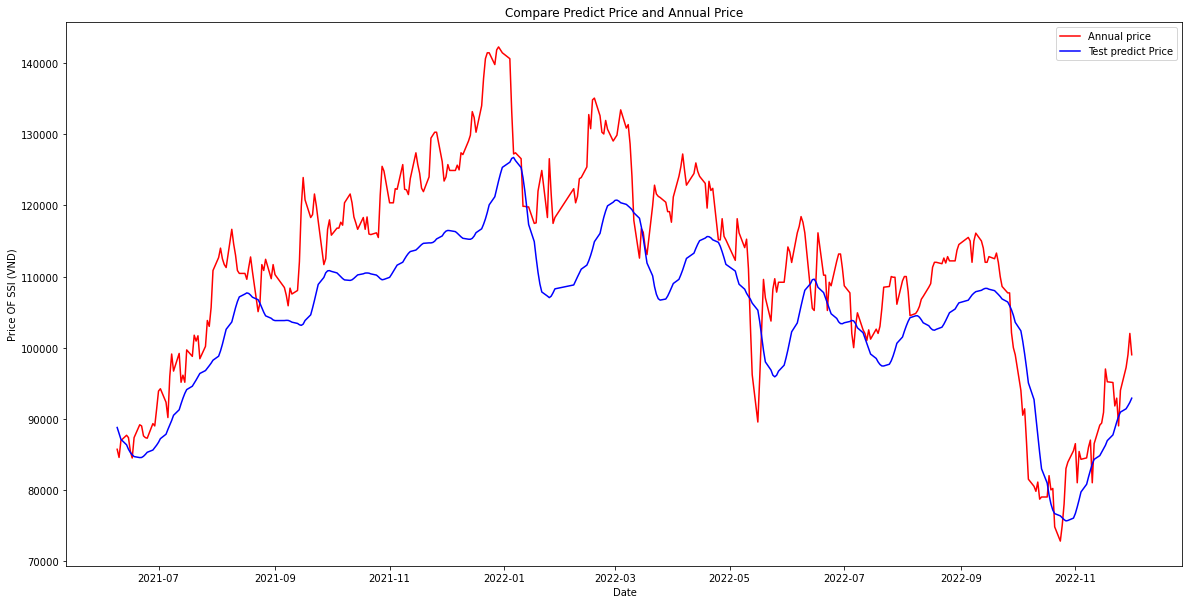

In [31]:
test_data1 = df[t:]
plt.figure(figsize=(20,10))
plt.plot(df[t:], label='Annual price', color='r')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('Date')
plt.ylabel('Price OF SSI (VND)')
plt.legend()
plt.show()

In [32]:
predictions_future = model.predict(x_test[-30:])

1/1 [==============================] - 0s 25ms/step


In [33]:
predictions_future

array([[0.35844293],
       [0.35535982],
       [0.35264197],
       [0.3501378 ],
       [0.3484685 ],
       [0.34899548],
       [0.35229906],
       [0.35858122],
       [0.3676121 ],
       [0.37758237],
       [0.38822782],
       [0.39879623],
       [0.40874788],
       [0.41799375],
       [0.42656705],
       [0.43305537],
       [0.43816984],
       [0.44280723],
       [0.4473898 ],
       [0.45235443],
       [0.45881432],
       [0.46668   ],
       [0.47555718],
       [0.4842085 ],
       [0.49211705],
       [0.4980159 ],
       [0.50255793],
       [0.506751  ],
       [0.5113693 ],
       [0.5171444 ]], dtype=float32)

In [34]:
predict = sc.inverse_transform(predictions_future)
predict

array([[76661.766],
       [76346.4  ],
       [76068.39 ],
       [75812.24 ],
       [75641.49 ],
       [75695.4  ],
       [76033.32 ],
       [76675.914],
       [77599.67 ],
       [78619.52 ],
       [79708.44 ],
       [80789.47 ],
       [81807.414],
       [82753.164],
       [83630.12 ],
       [84293.8  ],
       [84816.95 ],
       [85291.305],
       [85760.055],
       [86267.88 ],
       [86928.664],
       [87733.234],
       [88641.266],
       [89526.2  ],
       [90335.164],
       [90938.55 ],
       [91403.15 ],
       [91832.055],
       [92304.45 ],
       [92895.19 ]], dtype=float32)

In [35]:
predict.shape

(30, 1)

In [36]:
datelist_future = pd.date_range(start="12/2/2022",end="12/31/2022")

In [37]:
new_date=df.index.append(datelist_future)
new_date

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1279, freq=None)

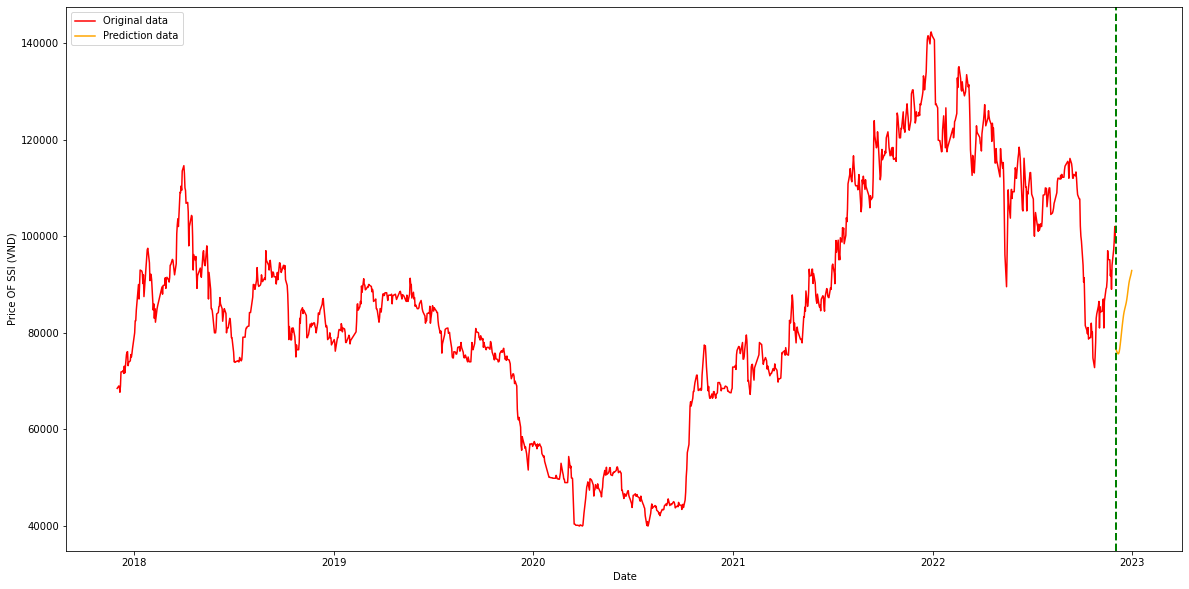

In [38]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df.index, df['Price'], 'red', label="Original data")
plt.plot(datelist_future, predict, 'orange', label="Prediction data")
plt.axvline(x = min(datelist_future), color='green', linewidth=2, linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price OF SSI (VND)')
plt.show()